In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [130]:
df = pd.read_csv('data/train.csv')

## Exploratory 

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
id                        50000 non-null int64
property_type             50000 non-null object
room_type                 50000 non-null object
amenities                 50000 non-null object
accommodates              50000 non-null int64
bathrooms                 49875 non-null float64
bed_type                  50000 non-null object
cancellation_policy       50000 non-null object
cleaning_fee              50000 non-null bool
city                      50000 non-null object
description               50000 non-null object
host_has_profile_pic      49877 non-null object
host_identity_verified    49877 non-null object
host_response_rate        37637 non-null object
host_since                49877 non-null object
instant_bookable          50000 non-null object
latitude                  50000 non-null float64
longitude                 50000 non-null float64
name                      50

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50000.0,35067.620360,20201.229334,0.000000,17564.000000,35101.500000,52547.250000,69999.000000
accommodates,50000.0,3.151780,2.170373,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,49875.0,1.233464,0.584081,0.000000,1.000000,1.000000,1.000000,8.000000
latitude,50000.0,38.453568,3.079660,33.338905,34.127573,40.662752,40.746226,42.390248
longitude,50000.0,-92.388038,21.709764,-122.510940,-118.342612,-76.996397,-73.954355,-70.985047
number_of_reviews,50000.0,21.080140,38.113959,0.000000,1.000000,6.000000,24.000000,605.000000
review_scores_rating,38729.0,94.053035,7.932111,20.000000,92.000000,96.000000,100.000000,100.000000
bedrooms,49945.0,1.264631,0.859241,0.000000,1.000000,1.000000,1.000000,10.000000
beds,49927.0,1.709536,1.266431,0.000000,1.000000,1.000000,2.000000,18.000000
price,50000.0,159.502500,167.605699,1.000000,74.000000,110.000000,184.000000,1999.000000


In [4]:
pd.set_option('display.max_columns', 30)
df.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price
0,46730,Apartment,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,Квартира рядом с метро ( 3мин пешком) 4 станци...,t,f,NaN,2016-12-14,t,40.577507,-73.985210,"Не дорогая комната в Нью-Йорке, в Бруклине",Coney Island,1,100.0,11224.0,1.0,1.0,50.0
1,48393,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,3.0,Real Bed,moderate,True,LA,"Spacious, bright penthouse loft Condo in Brent...",t,f,NaN,2016-02-27,f,34.047200,-118.465782,Penthouse Loft Condo in Brentwood,Brentwood,2,100.0,90049,1.0,1.0,200.0
2,41416,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,2.0,Real Bed,flexible,False,NYC,"Washington Heights. Brand new renovated, dark ...",t,t,70%,2012-03-05,f,40.853085,-73.928880,French Night in NYC,Washington Heights,0,NaN,10040,3.0,1.0,45.0
3,34506,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,""Family/kid frien...",4,1.0,Real Bed,moderate,True,NYC,Brownstone apartment in Harlem. Very quiet blo...,t,f,100%,2017-07-31,f,40.807185,-73.949837,Harlem brownstone apartment,Harlem,2,100.0,10027,2.0,3.0,130.0
4,43725,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,DC,Welcome to my flat in DC! About the apartmen...,t,f,50%,2011-05-22,f,38.900307,-77.016468,"""The Family"" Flat Downtown DC- 1023",Judiciary Square,102,95.0,20001,1.0,1.0,215.0


In [133]:
df.tail()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price
49995,30085,Condominium,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,NYC,Bedroom on top floor of Brooklyn brownstone in...,t,t,NaN,2012-02-13,f,40.677508,-73.981430,Clean private bedroom near Barclays,Park Slope,16,99.0,11217,1.0,1.0,100.0
49996,57551,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,""Family/kid frien...",2,1.0,Real Bed,flexible,False,NYC,Charming studio with separate kitchen that's c...,t,f,NaN,2014-01-21,f,40.765084,-73.909352,Two-Room Astoria Studio,Astoria,0,NaN,11103,0.0,1.0,65.0
49997,61640,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,"Adorable plant jungalow in Lower East Side, li...",t,t,100%,2010-05-18,f,40.720155,-73.990565,1BR LES Artist Jungalow,Lower East Side,1,100.0,10002,1.0,1.0,250.0
49998,3569,In-law,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",2,1.0,Real Bed,strict,True,SF,Spectacular bay front location across from the...,t,t,100%,2016-01-06,f,37.805153,-122.435702,Own Floor of Perfectly Located Grand Marina Home,Marina,38,97.0,94123,1.0,1.0,225.0
49999,39305,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,Chicago,In the heart of Ukrainian Village you will fin...,t,f,100%,2013-11-17,t,41.898242,-87.690388,Ukrainian Village Abode!,Humboldt Park,1,100.0,60622,1.0,1.0,70.0


In [141]:
df.corr()

,id,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
id,1.000000,-0.001080,0.000772,0.003458,0.000731,0.002403,-0.002219,0.002779,0.000264,-0.000361,-0.003144
accommodates,-0.001080,1.000000,0.506509,0.181544,-0.077921,-0.085223,0.040982,-0.013744,0.707746,0.810368,0.525293
bathrooms,0.000772,0.506509,1.000000,0.050484,-0.136089,-0.133987,-0.038414,0.011451,0.591407,0.527022,0.463389
cleaning_fee,0.003458,0.181544,0.050484,1.000000,-0.056608,-0.065876,0.106826,0.034355,0.102550,0.132621,0.031831
latitude,0.000731,-0.077921,-0.136089,-0.056608,1.000000,0.895549,-0.016212,-0.032866,-0.060006,-0.079674,-0.030816
longitude,0.002403,-0.085223,-0.133987,-0.065876,0.895549,1.000000,-0.052626,-0.048709,-0.077006,-0.080956,-0.057170
number_of_reviews,-0.002219,0.040982,-0.038414,0.106826,-0.016212,-0.052626,1.000000,0.013102,-0.032961,0.032377,-0.069006
review_scores_rating,0.002779,-0.013744,0.011451,0.034355,-0.032866,-0.048709,0.013102,1.000000,0.012547,-0.025972,0.063253
bedrooms,0.000264,0.707746,0.591407,0.102550,-0.060006,-0.077006,-0.032961,0.012547,1.000000,0.711677,0.500145
beds,-0.000361,0.810368,0.527022,0.132621,-0.079674,-0.080956,0.032377,-0.025972,0.711677,1.000000,0.438165


In [144]:
df.accommodates.value_counts()

2     21644
4      8159
1      6385
3      5184
6      3279
5      2238
8      1223
7       639
10      474
16      225
12      190
9       180
14       71
11       53
15       31
13       25
Name: accommodates, dtype: int64

In [145]:
df.bedrooms.value_counts()

1.0     33648
2.0      7560
0.0      4570
3.0      2890
4.0       903
5.0       243
6.0        73
7.0        29
8.0        13
10.0        8
9.0         8
Name: bedrooms, dtype: int64

In [146]:
df.bathrooms.value_counts()

1.0    39276
2.0     5262
1.5     2583
2.5     1053
3.0      707
3.5      286
4.0      191
0.5      154
0.0      137
4.5       78
5.0       48
5.5       34
8.0       29
6.0       19
7.0       10
6.5        5
7.5        3
Name: bathrooms, dtype: int64

In [147]:
df.beds.value_counts()

1.0     30608
2.0     11193
3.0      4284
4.0      2033
5.0       881
6.0       463
7.0       143
8.0       123
10.0       65
9.0        47
16.0       27
12.0       21
11.0       18
13.0        9
15.0        4
14.0        4
0.0         3
18.0        1
Name: beds, dtype: int64

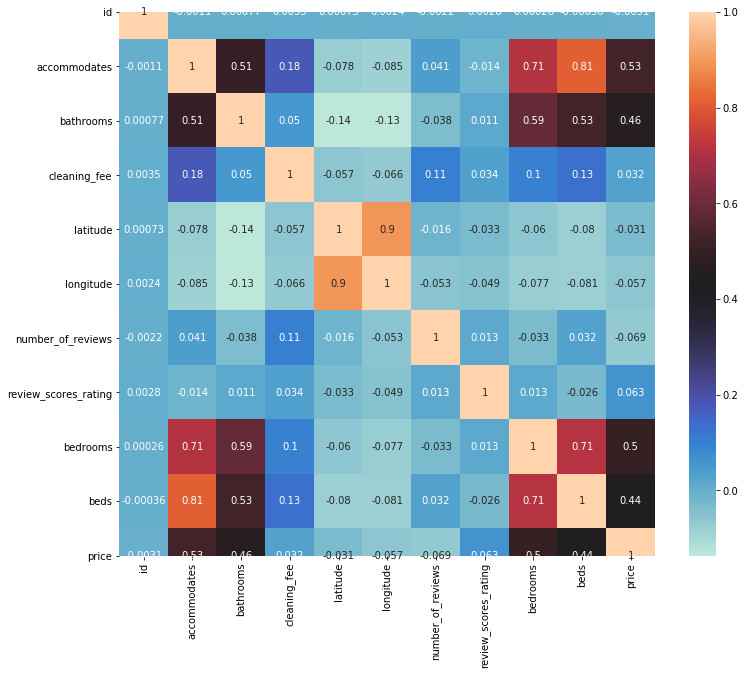

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire');

## Model 1

In [123]:
df = df.drop('id', axis=1)

In [124]:
target = 'price'
y = df[target]
X = df.drop(target, axis=1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [126]:
mapper = DataFrameMapper([
    (['accommodates'], StandardScaler()),
    (['bathrooms'], SimpleImputer(strategy='most_frequent')),
    (['bedrooms'], SimpleImputer(strategy='most_frequent')),
    (['beds'], SimpleImputer(strategy='most_frequent')),
    ('room_type', LabelBinarizer()),
    ('property_type', LabelBinarizer()),
    ('city', LabelBinarizer()),
    (['latitude'], StandardScaler()),
    (['longitude'], StandardScaler()),
    ], df_out = True
)

In [127]:
Z_train = mapper.fit_transform(X_train)

In [128]:
Z_test = mapper.transform(X_test)

In [129]:
model = LinearRegression().fit(Z_train, y_train)
model.score(Z_test, y_test)

0.4182014318036087

In [ ]:
#test1 = pd.read_csv('data/test.csv')

#test1['price'] = model.predict(mapper.transform(test1))

#test1[['id', 'price']]

In [ ]:
##test1[['id','price']].to_csv('linear_regression.csv', index=False)

## Model 2

In [10]:
df = df.drop('id', axis=1)

In [11]:
target = 'price'
y = df[target]
X = df.drop(target, axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
mapper = DataFrameMapper([
    (['accommodates'], StandardScaler()),
    (['bathrooms'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['latitude'], StandardScaler()),
    (['longitude'], StandardScaler()),
    (['number_of_reviews'], StandardScaler()),
    (['review_scores_rating'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['bedrooms'], [SimpleImputer(strategy='most_frequent', ), StandardScaler()]),
    (['beds'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    ('room_type', LabelBinarizer()),
    ('property_type', LabelBinarizer()),
    ('bed_type', LabelBinarizer()),
    ('cancellation_policy', LabelBinarizer()),
    ('cleaning_fee', LabelBinarizer()),
    ('city', LabelBinarizer()),
    ('host_has_profile_pic', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('host_identity_verified', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('instant_bookable', LabelBinarizer()),
    ], df_out = True
)

In [14]:
Z_train = mapper.fit_transform(X_train)

In [15]:
Z_test = mapper.transform(X_test)

In [16]:
model = LinearRegression().fit(Z_train, y_train)
model.score(Z_test, y_test)

0.4377354707156213

In [17]:
np.set_printoptions(suppress=True)

mean_squared_error(y_test, model.predict(Z_test))**(1/2)

128.88119524106827

In [ ]:
#test1 = pd.read_csv('data/test.csv')

#test1['price'] = model.predict(mapper.transform(test1))

#test1[['id', 'price']]

In [ ]:
##test1[['id','price']].to_csv('linear_regression2.csv', index=False)

## Lasso

In [18]:
## Lasso
model = Lasso()
params = {
    'alpha': [.0001, .001, .01, .1, 1],
    'fit_intercept': [True, False],
}

In [19]:
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)

In [20]:
grid.fit(Z_train, y_train)
grid.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   59.2s finished
/Users/BA/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285496596.89893, tolerance: 198652.6178
  positive)


0.4266000190018131

In [21]:
grid.best_params_

{'alpha': 0.001, 'fit_intercept': False}

## Ridge

In [22]:
## Ridge
model = Ridge()
params = {
    'alpha': [.0001, .001, .01, .1, 1],
    'fit_intercept': [True, False],
}

In [23]:
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)

In [24]:
grid.fit(Z_train, y_train)
grid.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.5s finished


0.4359153024665274

In [25]:
grid.best_params_

{'alpha': 0.0001, 'fit_intercept': True}

## Elastic Net

In [26]:
## ElasticNet
model = ElasticNet()
params = {
    'alpha': [.0001, .001, .01, .1, 1],
    'fit_intercept': [True, False],
}

In [27]:
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)

In [28]:
grid.fit(Z_train, y_train)
grid.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.6s finished
/Users/BA/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294864530.8793081, tolerance: 198652.6178
  positive)


0.42662480770852185

In [29]:
grid.best_params_

{'alpha': 0.0001, 'fit_intercept': False}

In [153]:
model = grid.best_estimator_

model.score(Z_train, y_train)
score = model.score(Z_test, y_test)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

<Figure size 720x720 with 0 Axes>

In [ ]:
#test = pd.read_csv('data/test.csv')

#test['price'] = model.predict(mapper.transform(test))

#test[['id', 'price']]

In [ ]:
## test[['id','price']].to_csv('linear_regression3.csv', index=False)

## Huber

In [30]:
## Huber Regression
model = HuberRegressor().fit(Z_train, y_train)
model.score(Z_test, y_test)

0.3433669996523617

## Bayesian Ridge

In [31]:
## Bayesian Ridge
model = linear_model.BayesianRidge()
model.fit(Z_train, y_train)
model.score(Z_test, y_test)

0.4376017900109313

## Model 3
Model 3 was garbage - it performed worse then my very first model. During the clean up of the notebooks, I accidently saved over the page, deleting the model.

## Model 4

In [32]:
df = pd.read_csv('data/train.csv')

In [49]:
mapper = DataFrameMapper([
    (['accommodates'], StandardScaler()),
    (['bathrooms'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['latitude'], StandardScaler()),
    (['longitude'], StandardScaler()),
    (['number_of_reviews'], StandardScaler()),
    (['review_scores_rating'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['bedrooms'], [SimpleImputer(strategy='most_frequent', ), StandardScaler()]),
    (['beds'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    ('room_type', LabelBinarizer()),
    ('property_type', LabelBinarizer()),
    ('bed_type', LabelBinarizer()),
    ('cancellation_policy', LabelBinarizer()),
    ('cleaning_fee', LabelBinarizer()),
    ('city', LabelBinarizer()),
    ('host_has_profile_pic', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('host_identity_verified', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('instant_bookable', LabelBinarizer()),
    ], df_out = True
)

In [43]:
Z_train = mapper.fit_transform(X_train)

In [44]:
Z_test = mapper.transform(X_test)

In [58]:
rand_forest = RandomForestRegressor(random_state=42)

In [59]:
rand_forest.fit(Z_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [62]:
rand_forest.score(Z_test, y_test)

0.5283979148686344

In [63]:
mean_squared_error(y_test, rand_forest.predict(Z_test))**(1/2)

118.03398506193037

In [ ]:
##test = pd.read_csv('data/test.csv')

##test['price'] = rand_forest.predict(mapper.transform(test))

##test[['id', 'price']]

In [ ]:
##test[['id','price']].to_csv('linear_regression4.csv', index=False)

## Model 5

In [74]:
mapper = DataFrameMapper([
    (['accommodates'], StandardScaler()),
    (['bathrooms'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['latitude'], StandardScaler()),
    (['longitude'], StandardScaler()),
    (['number_of_reviews'], StandardScaler()),
    (['review_scores_rating'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    (['bedrooms'], [SimpleImputer(strategy='most_frequent', ), StandardScaler()]),
    (['beds'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    ('room_type', LabelBinarizer()),
    ('property_type', LabelBinarizer()),
    ('bed_type', LabelBinarizer()),
    ('cancellation_policy', LabelBinarizer()),
    ('cleaning_fee', LabelBinarizer()),
    ('city', LabelBinarizer()),
    ('host_has_profile_pic', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('host_identity_verified', [CategoricalImputer(strategy='most_frequent') , LabelBinarizer()]),
    ('instant_bookable', LabelBinarizer()),
    ], df_out = True
)

In [75]:
Z_train = mapper.fit_transform(X_train)

In [76]:
Z_test = mapper.transform(X_test)

In [80]:
model = RandomForestRegressor(random_state=42)

In [81]:
model.fit(Z_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [82]:
model.score(Z_test, y_test)

0.531281399737783

In [108]:
model = RandomForestRegressor()
params = {
    'n_estimators': [1000, 1500, 2000],
    'max_leaf_nodes': [100, 500, 1000]
}

In [109]:
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)

In [110]:
# 49.3 min run time
grid.fit(Z_train, y_train)
## 0.5320946959032717
grid.best_score_ 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 49.3min finished


0.5320946959032717

In [111]:
## {'max_leaf_nodes': 1000, 'n_estimators': 1500}
grid.best_params_

{'max_leaf_nodes': 1000, 'n_estimators': 1500}

In [112]:
model = RandomForestRegressor()
params = {
    'n_estimators': [1500],
    'max_leaf_nodes': [1000, 2500, 5000]
}

In [113]:
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)

In [114]:
# 31.4 min run time
grid.fit(Z_train, y_train)
## 0.5324001527688095
grid.best_score_ 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 31.4min finished


0.5324001527688095

In [115]:
## {'max_leaf_nodes': 5000, 'n_estimators': 1500}
grid.best_params_

{'max_leaf_nodes': 5000, 'n_estimators': 1500}

In [117]:
model = grid.best_estimator_

In [121]:
model.score(Z_test, y_test)

0.5686028306718109

In [119]:
##test = pd.read_csv('data/test.csv')

##test['price'] = model.predict(mapper.transform(test))

##test[['id', 'price']]

,id,price
0,54473,142.258795
1,9950,82.826089
2,50751,66.514907
3,22699,183.353485
4,11075,126.118092
...,...,...
19995,37194,73.709227
19996,6265,67.612465
19997,54886,182.655086
19998,860,105.502457


In [120]:
##test[['id','price']].to_csv('linear_regression5.csv', index=False)

I was working across a few different notebooks which made this final submission look a little sloppy. I wanted to show that I used every aspect of what you showed us, thats why I left some grid searchers in there that will take ~40 minutes to run. I also commented each time I saved a CSV file as to not record over them again. 